Привет! меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на красные комментарии ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:


<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Спасибо за  качественную работу, было интересно ее проверять.
- Я оставил некоторые советы надеюсь они будут полезными или интересными.

- Есть небольшие недочеты, но думаю у тебя не составить труда их исправить
- Жду обновленную работу!


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
* Спасибо за оперативность
- Приятно видеть фидбек 
- Недочеты исправлены - работа полностью корректна
- Рад был быть полезен. Удачи в дальнейшем обучении!

# Выбор локации для скважины

 Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самым высокими оценками значений. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины;
- Определяют регион с максимальной суммарной прибылью отобранных скважин.

**Цель**
1) Построить модель для определения региона, где добыча принесёт наибольшую прибыль.
 - Проанализируйте возможную прибыль и риски техникой Bootstrap.


## 1  Загрузка и подготовка данных

In [6]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import seaborn as sns # для графиков
from matplotlib import pyplot as plt # для графиков
import numpy as np 
import plotly.express as px # для графиков

import sweetviz as sv

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (train_test_split, # разбивает на выборки
                                     cross_val_score)

from sklearn.preprocessing import StandardScaler # для приведение к одному масштабу (масштабирование)
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.metrics import (mean_absolute_error, 
                             precision_score ,
                             recall_score,
                             f1_score,
                             accuracy_score)


from sklearn.utils import shuffle # для перемешевания данных

from scipy import stats as st # позаимствовал
from sklearn.metrics import mean_squared_error, r2_score# позаимствовал
import warnings
warnings.filterwarnings("ignore")


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>

## Описание данных

**Признаки**
-	f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
-	product — объём запасов в скважине (тыс. баррелей);
-	id — уникальный идентификатор скважины.



### Данные геологоразведки 3 регионов

In [8]:
def graphik(df):
    print("Распределение не целевых признаков:")
    df[["f0","f1","f2"]].hist()
    plt.show()

In [9]:
try:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df_0 = pd.read_csv('geo_data_0.csv')
    
try:
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df_1 = pd.read_csv('geo_data_1.csv')
    
try:
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_2 = pd.read_csv('geo_data_2.csv')

In [10]:
# Данные геологоразведки первого региона
display(df_0.head())
df_0.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Распределение не целевых признаков:


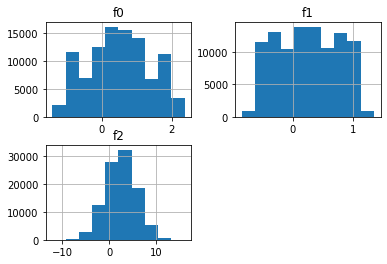

In [11]:
graphik(df_0)

In [12]:
display(df_1.head())
df_1.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Распределение не целевых признаков:


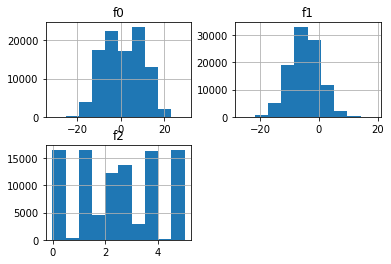

In [13]:
graphik(df_1)

In [14]:
display(df_2.head())
df_2.info()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
display(df_0[['f0','f1','f2', 'product']].corr())
display(df_1[['f0','f1','f2', 'product']].corr())
df_2[['f0','f1','f2', 'product']].corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [16]:
display(df_0.describe())
display(df_1.describe())
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Распределение не целевых признаков:


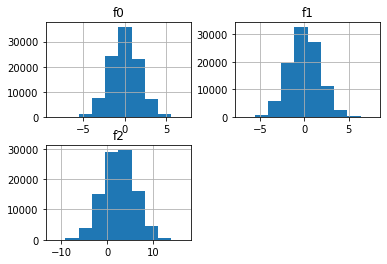

In [17]:
graphik(df_2)

In [18]:
#df_0['revenue'] = df_0['product']*450
#df_1['revenue'] = df_0['product']*450
#df_2['revenue'] = df_0['product']*450

In [22]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [23]:
import pandas_profiling
# #from ydata_profiling import ProfileReport
profile = ProfileReport(df_0, title="Profiling Report")
pandas_profiling.ProfileReport(df_0)

ModuleNotFoundError: No module named 'pandas_profiling'

                                             |          | [  0%]   00:00 -> (? left)


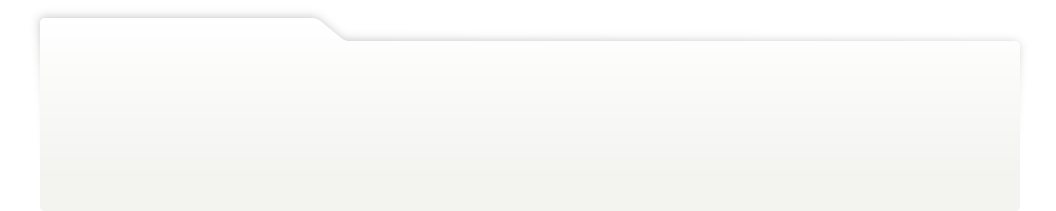
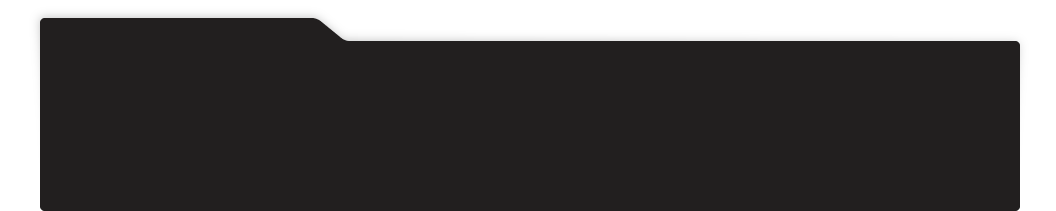
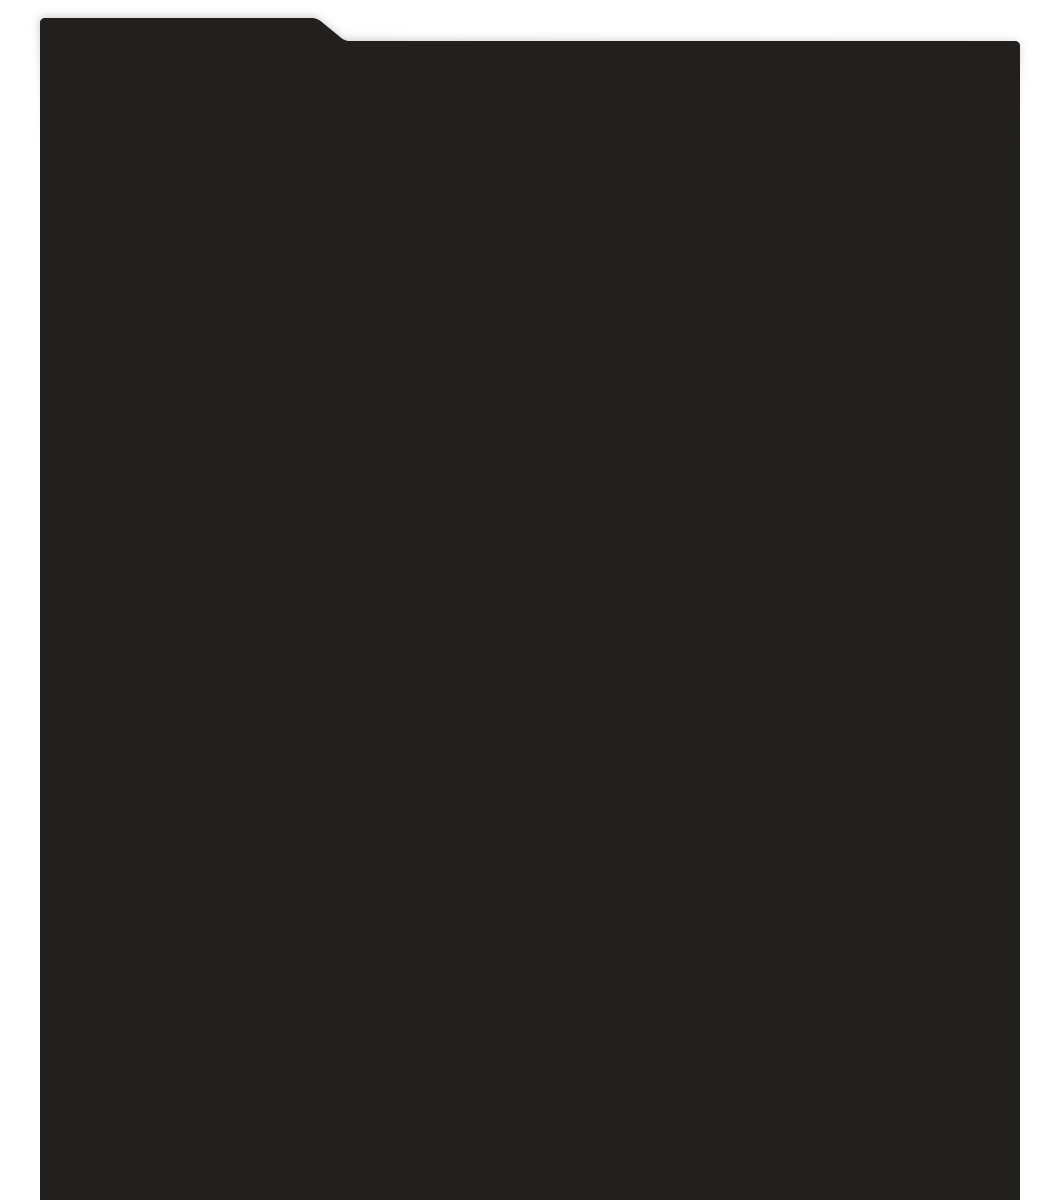
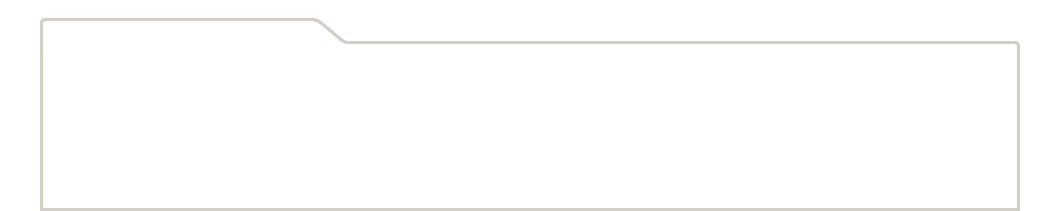
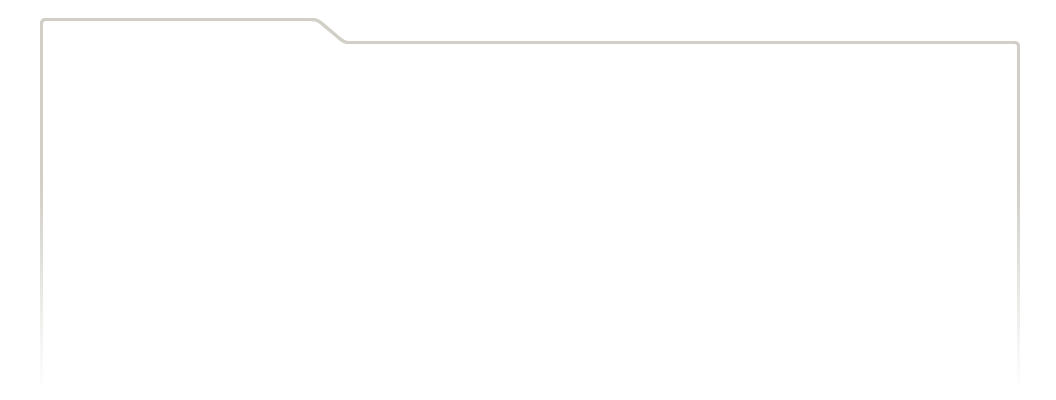
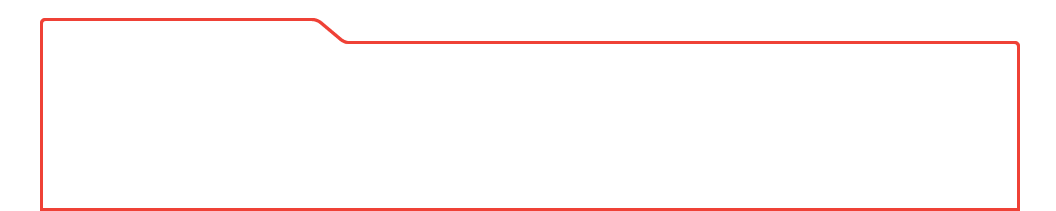
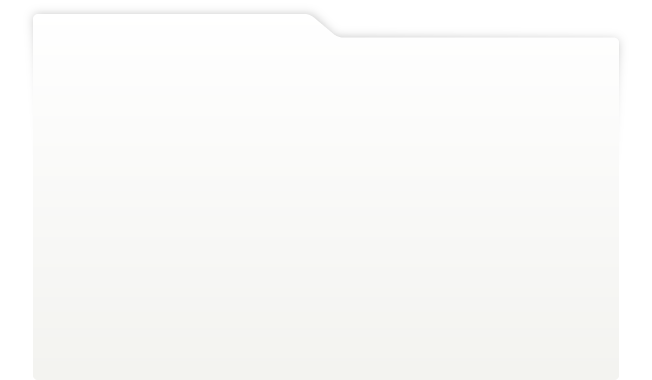
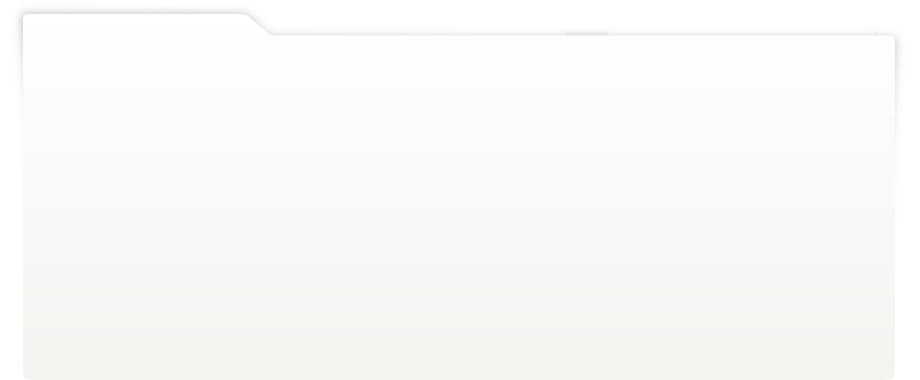
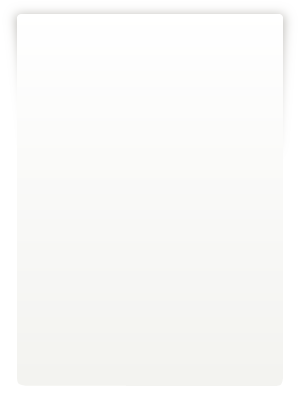
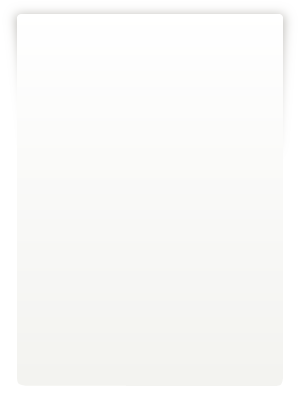
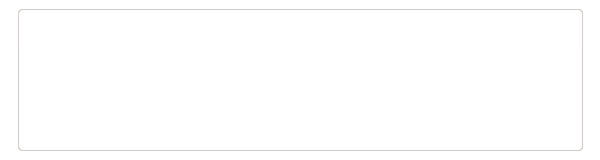
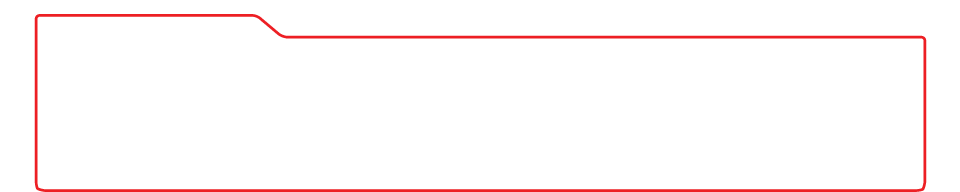
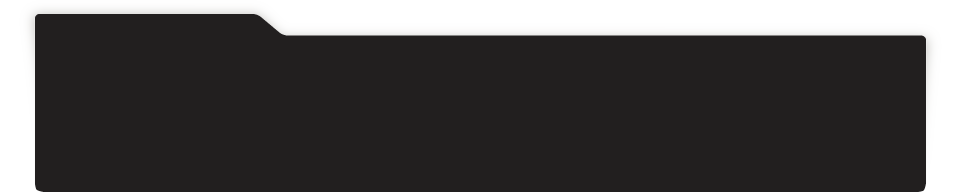
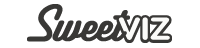
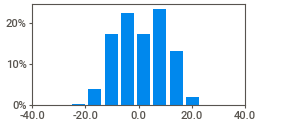
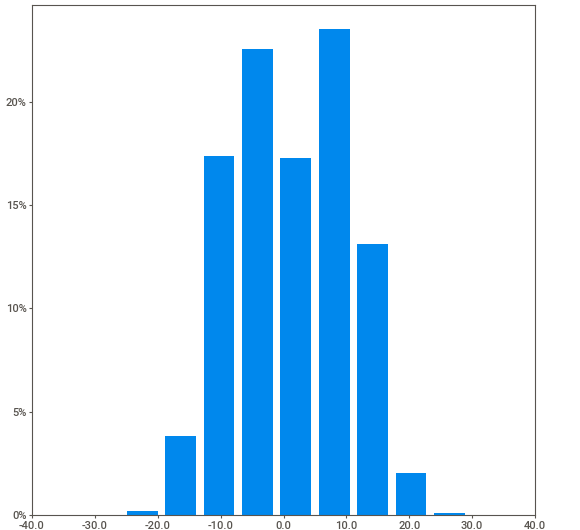
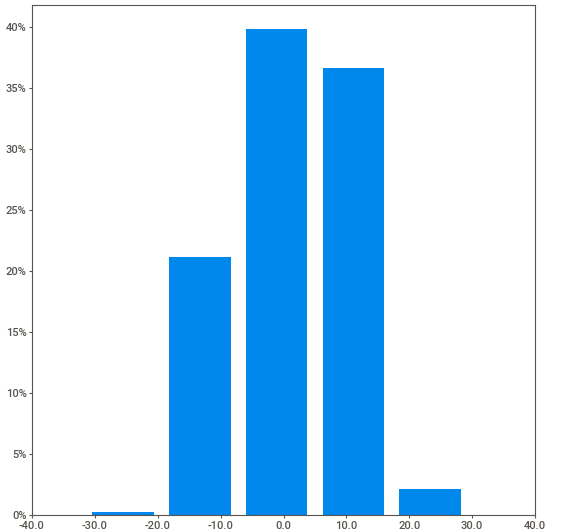
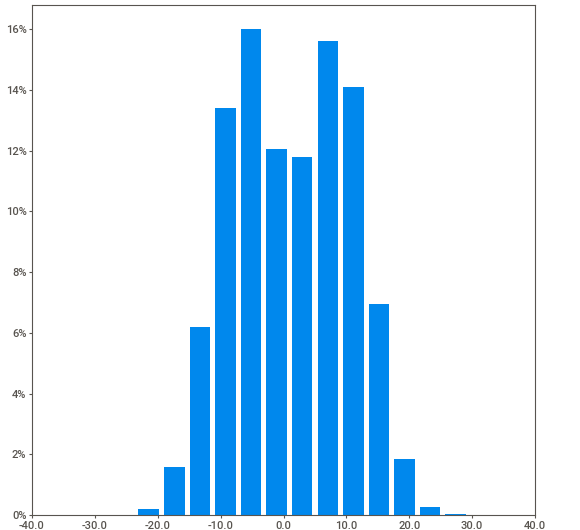
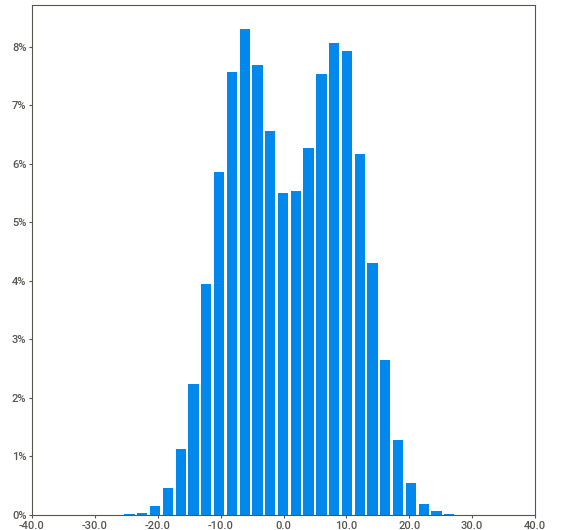
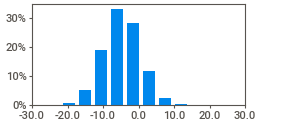
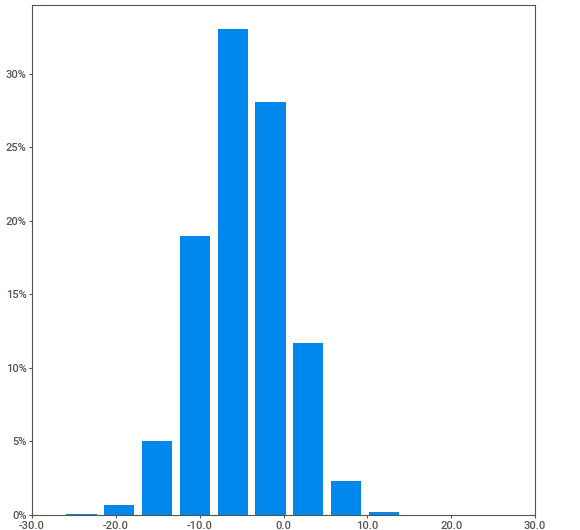
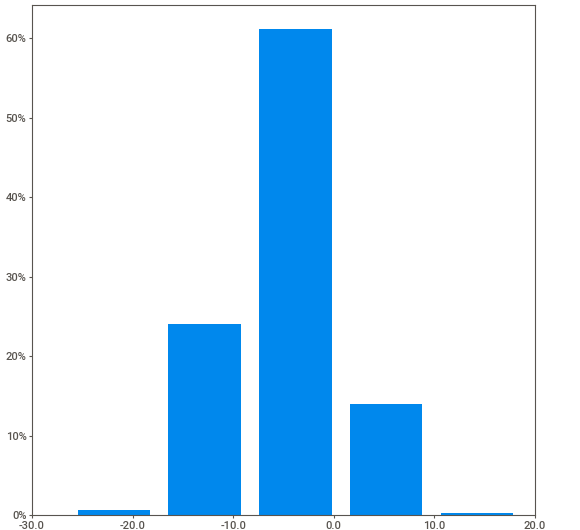
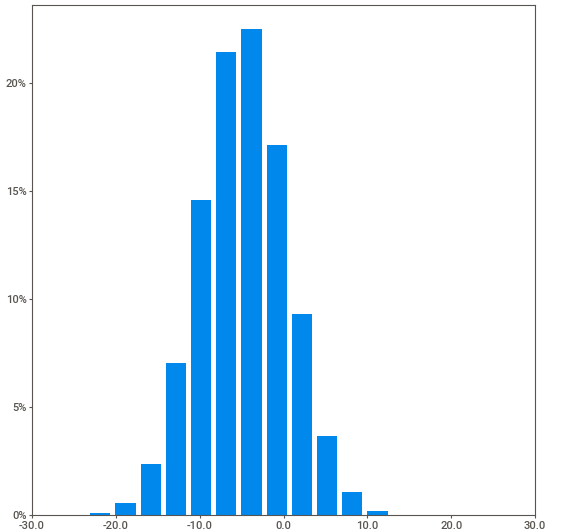
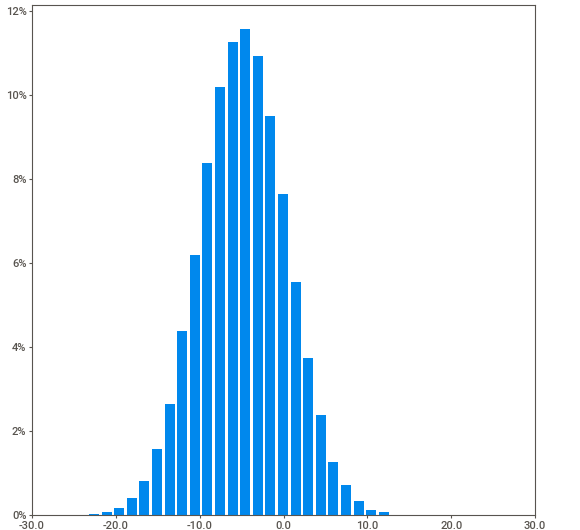
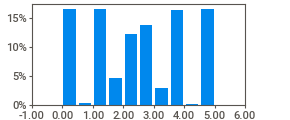
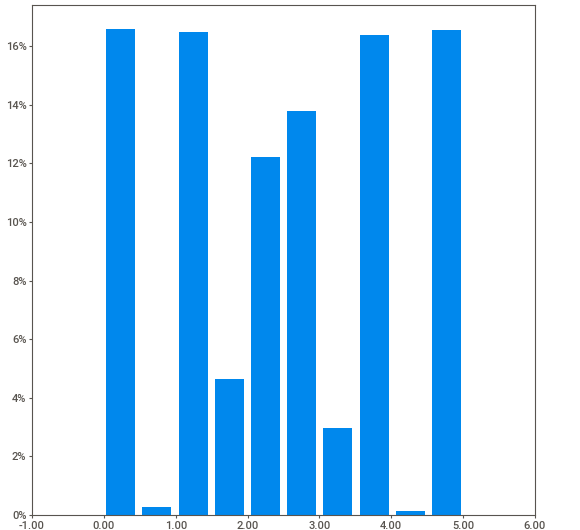
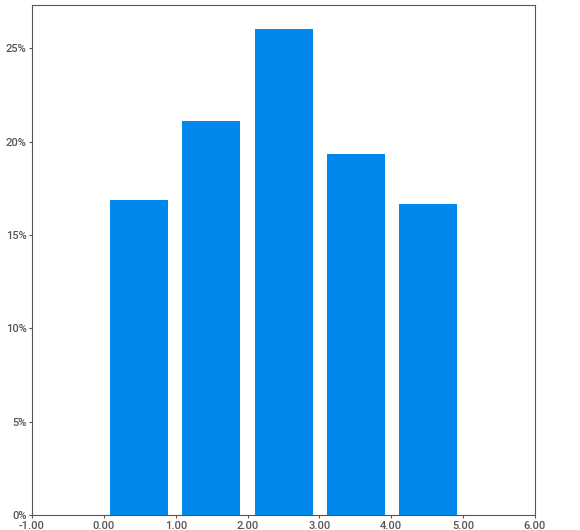
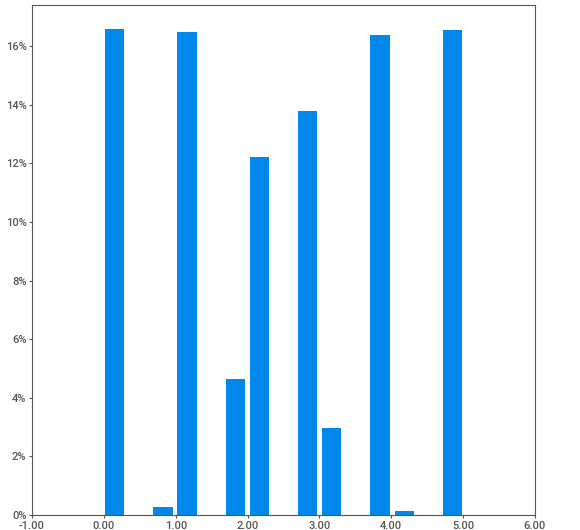
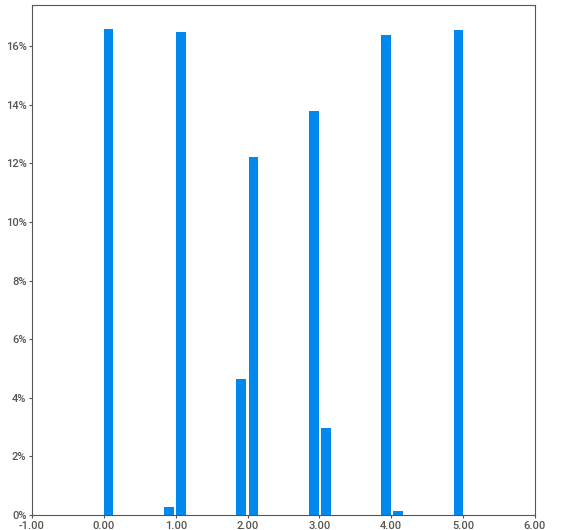
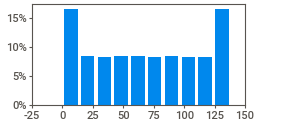
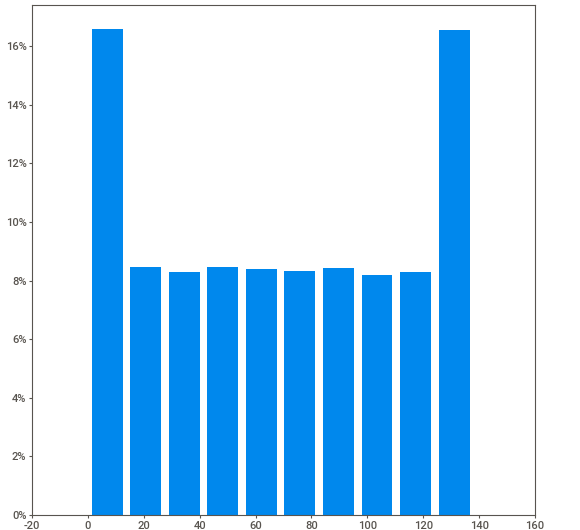
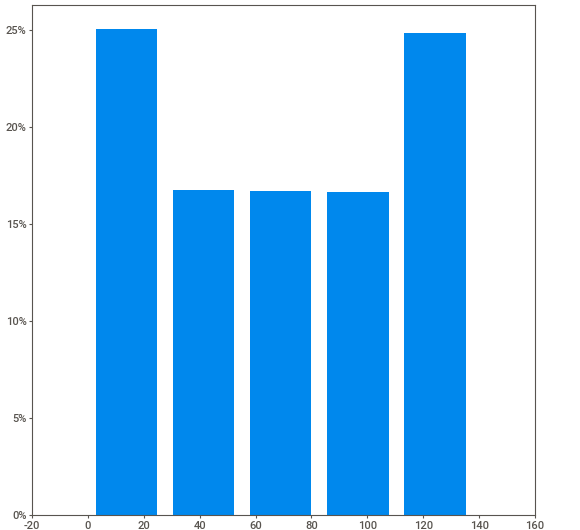
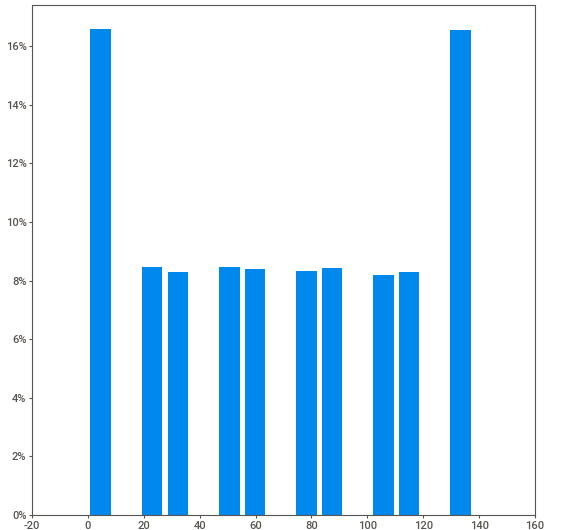
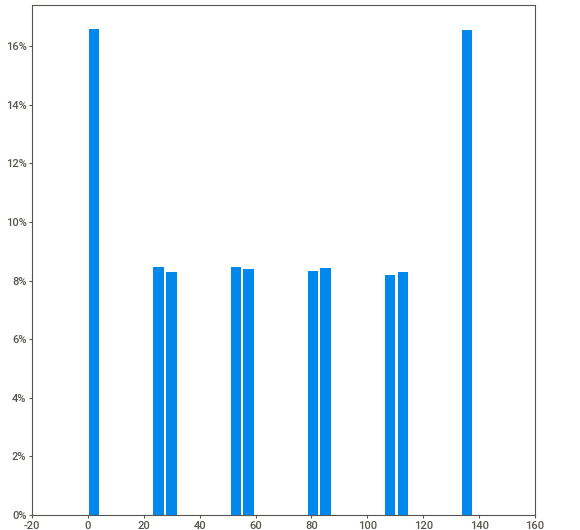
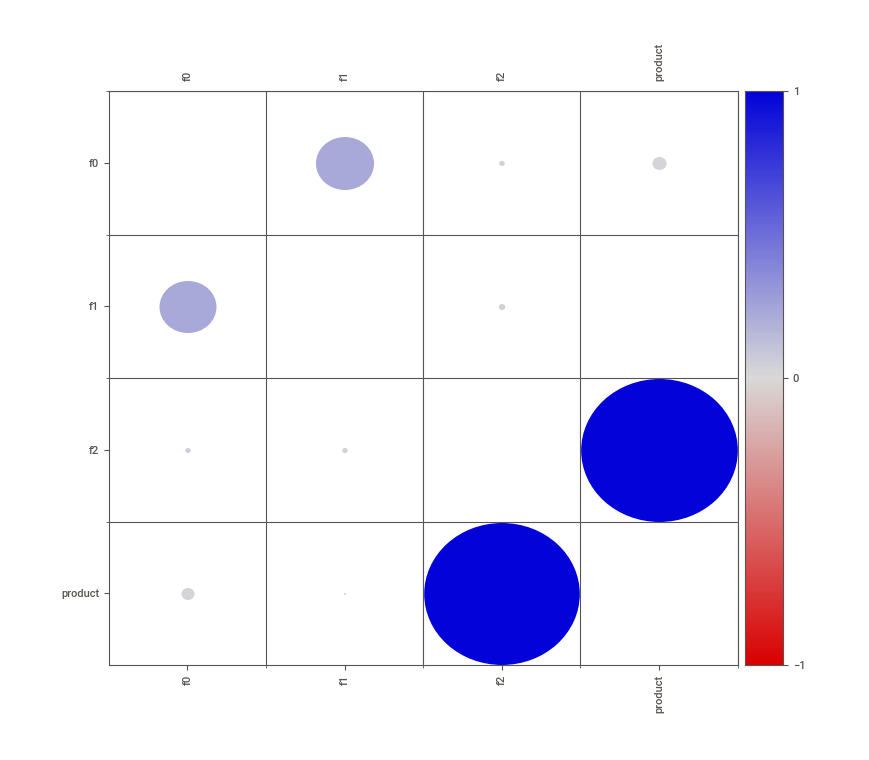
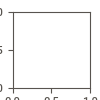

In [21]:
report = sv.analyze([df_1, " Permit Logs"])
report.show_notebook()

In [ ]:
report.show_html('common analysis.html')

In [100]:
df_unique_ids_roles = df_1[['f2', 'product']].copy()
df_unique_ids_roles 


,f2,product
0,-0.005876,3.179103
1,0.999183,26.953261
2,5.001160,134.766305
3,4.999415,137.945408
4,5.004363,134.766305
...,...,...
99995,1.998296,53.906522
99996,5.005581,137.945408
99997,4.998651,137.945408
99998,1.000146,30.132364


In [101]:
report = sv.analyze([df_unique_ids_roles, 'Unique ids and roles'])
report.show_html('Unique ids and roles.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Unique ids and roles.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Выводы по первому блоку:

1) Во всех трех регионах прослеживается прямая взаимосвязь признака f2 c product (объёмом запасов в скважине) ;
- в частности в регионе под переменной df_1 зависимость прямо прапорциональная, с показателем 0,99;
- в регионах под переменной df_0 и df_2 также наблюдается прямая взаимосвязь, но не столь ярко выраженная, в диапазоне от 0,44 до 0,48; 

2)  Данные не имеют пропусков, все типы столбцов определены правильно и соответствуют значениям, поэтому можно приступать к работе с ними;

3) Исходя из гистограмм по признакам f0,f1,f2 выбросов не так много, вероятнее всего выбросов не будет или их будет мало.






<div class="alert alert-block alert-info">
<b>Совет:</b> Можно было бы еще выдвинуть предположение, откуда такая высокая корреляция во 2 регионе с целевым признаком могла возникнуть
</div>



<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошо, особенно радует, что изучены корреляции, так как мы планируем использовать линейные модели, а для них это важно. 
</div>


<div class="alert alert-block alert-info">
<b>Совет:</b>  Советую обратить внимание на библиотеки sweetviz и pandas_profiling помогут в проведении более тщательного EDA анализа. Исследовательский анализ можно делать и с помощью ручного вызова функций дефолтных библиотек. Данные библиотеки хороши для максимизации комфорта презентации результатов анализа бизнес-пользователям.  

Очень просты в использоовании, на вход кладется датафрейм: pandas_profiling.ProfileReport(df) 
</div>


<div class="alert alert-block alert-warning">
<b>Комментарий: </b>я думал какое предположение выдвинуть, но так как показатель f2 во втором регионе мало чем отличается по медиане и среднему от других регионов , предположений у меня не нашлось  
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения: с помощью import sweetviz as sv открыл отчет в новом формате и отдельно создал отчет для 2 признаков
   
    
С библиотекой # import pandas_profiling ничего не вышло, выдавало ошибку (выше код закомментированн)
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b>
    
1) Профайлер нужно тоже установить через `!pip install`.
    
2) Для sweetviz можно делать `.show_notebook()`
    
    
P.S. Главное во время обучения не злоупотреблять, чтобы руки не забыл как делать EDA анализ)
</div>


# 2  Обучение и проверка модели

### Вывод:
Выбросы наблюдаются во всех трех регионах. 

В частности во всех не целевых признаках третьего региона. 

И по одному признаку в первом и втором регионах.

Будем стандартизировать признаки(масштабировать).

In [102]:
# Создадим функцию которая принимает на вход датасет, делит df на train и valid
# стандартизирует признаки
# Обучает линейную модель
# возвращает предсказания, целевой признак, RMSE и R2

def multi_function(df):

    features = df.drop(["product","id"], axis=1) # Отберем НЕ ЦЕЛЕВЫЕ признаки
    target = df["product"] # ЦЕЛЕВОЙ ПРИЗНАК
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, 
                                                                                  random_state=12345)
    scaler = StandardScaler() # масштабирование
    features_train = scaler.fit_transform(features_train) # масштабирование признаков не целевых train
    features_valid = scaler.transform(features_valid) # масштабирование признаков не целевых valid
    
    model = LinearRegression() # normalize – логический (False по умолчанию) параметр, который решает, нормализовать входные переменные (True) или нет (False).
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, predictions_valid)**0.5
    print('Среднеквадратичная ошибка RMSE:{0:.3f}'.format(rmse))
    average_product = predictions_valid.mean() # средеий запас
    print('Среднее количество запасов: {0:.2f}'.format(average_product))
    r2 = r2_score(target_valid, predictions_valid)
    print('Коэффициент детерминации: {0:.2f}'.format(r2))
    return (predictions_valid, target_valid.reset_index(drop=True), rmse, r2)



# model.fit(features_train,target_train) 
# # < напишите код здесь >
# predicted_valid =  model.predict(features_valid) # сохраните предсказания модели на валидационых данных
# mse = mean_squared_error(target_valid, predicted_valid)
# rmse = mse**0.5
# # < напишите код здесь >

# print("MSE =", mse)
# print("RMSE =", mse ** 0.5)
# Результат
# MSE = 2129.8240528555293
# RMSE = 46.1500168240005
# https://proglib.io/p/linear-regression



<div class="alert alert-block alert-success">
<b>Успех:</b> Масштабирование проведено корректно
</div

### Выведем и сохраним значения трех регионов

In [103]:
# Сохраним значения в трех регионах
print('Регион №1:')
predictions_1, target_valid_1, rmse_1, r2_1 = multi_function(df_0)
print('Регион №2:')
predictions_2, target_valid_2, rmse_2, r2_2 = multi_function(df_1)
print('Регион №3:')
predictions_3, target_valid_3, rmse_3, r2_3 = multi_function(df_2)

Регион №1:
Среднеквадратичная ошибка RMSE:37.579
Среднее количество запасов: 92.59
Коэффициент детерминации: 0.28
Регион №2:
Среднеквадратичная ошибка RMSE:0.893
Среднее количество запасов: 68.73
Коэффициент детерминации: 1.00
Регион №3:
Среднеквадратичная ошибка RMSE:40.030
Среднее количество запасов: 94.97
Коэффициент детерминации: 0.21


In [104]:
# Напечатаем на экране средний запас предсказанного сырья и RMSE модели
new_data = pd.DataFrame(index=['средний запас предсказанного сырья','RMSE модели', 'R2 (коэффициент детерминации)'],\
                               columns=['1 регион','2 регион','3 регион'])
new_data['1 регион'] = predictions_1.mean(), rmse_1, r2_1
new_data['2 регион'] = predictions_2.mean(), rmse_2, r2_2
new_data['3 регион'] = predictions_3.mean(), rmse_3, r2_3
display(new_data)




,1 регион,2 регион,3 регион
средний запас предсказанного сырья,92.592568,68.728547,94.965046
RMSE модели,37.579422,0.893099,40.029709
R2 (коэффициент детерминации),0.279943,0.999623,0.205248


Коэффициент детерминации, или метрика R2 (англ. coefficient of determination; R-squared), вычисляет долю средней квадратичной ошибки модели от MSE среднего, а затем вычитает эту величину из единицы. Увеличение метрики означает прирост качества модели. 

 
- Значение метрики R2 равно единице только в одном случае, если MSE нулевое. Такая модель предсказывает все ответы идеально.
- R2 равно нулю: модель работает так же, как и среднее.
- Если метрика R2 отрицательна, качество модели очень низкое.
- Значения R2 больше единицы быть не может.

**Вывод**:

В нашем случаи показатель детерминации равен 1 во втором регионе, что выглядит странно, так как модель предсказывает все ответы верно. 

В 1-ом регионе и в третьем показатели более реалистичные, 0,28 и 0,21 соответственно, что говорит о хорошем качестве модели, но не идеальной.

### Вывод
Модели обучены и проверены на качество предсказания метрикой RMSE, которая определяет величину среднеквадратичной ошибки в предсказании модели. Исходя из полученных данный в нашей сводной таблицы, можно заметить, что величина RMSE во втором регионе сильно отличается от двух других, это связано с тем, что модель обучилась на практически равных по величине данных, и величина ошибки этой модели не может сильно варьирываться.


<div class="alert alert-block alert-success">
<b>Успех:</b> Шаг проделан лаконично, все метрики посчитаны корректно
</div> 

## 3  Подготовка к расчёту прибыли



Все ключевые значения для расчётов сохраним в отдельных переменных

При разведке региона исследуюем 500 точек, из которых с помощью машинного обучения выберем 200 лучших для разработки.

Бюджет на разработку скважин в регионе — 10 млрд рублей.

При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.

In [105]:
df_0.head(15)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [106]:
budget = 10_000_000 #Бюджет на разработку скважин в регионе, тыс.руб
income_one_product = 450 #Доход с каждой единицы продукта, тыс.руб
probability_losses = 2.5 / 100 # вероятность убытков
product_mean_0 = df_0['product'].mean()
product_mean_1 = df_1['product'].mean()
product_mean_2 = df_2['product'].mean()


<div class="alert alert-block alert-info">
    
<b>Совет:</b> Константы принято записывать в ВЕРХНЕМ РЕГИСТРЕ =) Читем здесь https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#section-29
    
А большие значение можно записывать так: `10_000_000`.
</div> 


<div class="alert alert-block alert-warning">
<b>Комментарий: </b>На счет констант знаю, просто нелепо выглядело,не хотелось, в будущих работах учту, на счет преобразования в цифрах не знал, спасибо 
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> 10_000_000
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Дело привычки, нелепости нет)
</div>

In [107]:
t = budget / income_one_product
print(f'Начало окупаемости начинается после {round(t)} тыс. баррелей')

Начало окупаемости начинается после 22222 тыс. баррелей


In [108]:
print(f'Средний запас нефти в каждой скважине из 200 для безубыточного функционирования = {round(t/200)} тыс. единиц баррелей')

Средний запас нефти в каждой скважине из 200 для безубыточного функционирования = 111 тыс. единиц баррелей


In [109]:
budget_per_1=(budget/200) # тыс.руб делим бюджет на 200 лучших скважин
print('Бюджет на разработку одной скважины:', budget_per_1/1000,'млн.руб')

Бюджет на разработку одной скважины: 50.0 млн.руб


### Вывод:
Средний запас сырья в скважинах по каждому из регионов меньше, чем точка безубыточности, ближе всего по средним показателям запаса сырья находятся 1-ый и 3-ий регион, 92 и 94 тыс. баррелей соответственно.

### Создадим новые столбцы с доходом от продажи 1 ед. барреля под названием 'revenue'

In [110]:
df_0['revenue']=(df_0['product']*(income_one_product)).round(2) 
df_1['revenue']=(df_1['product']*(income_one_product)).round(2) 
df_2['revenue']=(df_2['product']*(income_one_product)).round(2) 

df_0.head()

,id,f0,f1,f2,product,revenue
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49


### Создадим новый столбец со значение ROI для каждой скважины по отношению к затратам на разработку

In [111]:
df_0['roi_in_%']=((df_0['revenue']-budget_per_1)/budget_per_1*100).round(2)
df_0.head()

,id,f0,f1,f2,product,revenue,roi_in_%
0,txEyH,0.705745,-0.497823,1.221170,105.280062,47376.03,-5.25
1,2acmU,1.334711,-0.340164,4.365080,73.037750,32866.99,-34.27
2,409Wp,1.022732,0.151990,1.419926,85.265647,38369.54,-23.26
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,75879.35,51.76
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,69316.49,38.63


Инвесторы хотят знать, когда их вложения окупятся.

Для них главная метрика — ROI (от англ. return on investments, «возврат на инвестиции»).
 
Например, инвестирование 50 млн на каждую скважину из 1 миллиард рублей. 

Наконец скважина принесла 47 376 000  прибыли (1-ая строка объекта первого региона).

Текущий ROI вложений: (47 376 000 миллионов - 50 000 000) / 50 000 000* 100% = −5,25%. То есть 5,25% вложений пока не окупились.


In [112]:
df_1['roi_in_%']=((df_1['revenue']-budget_per_1)/budget_per_1*100).round(2)
df_2['roi_in_%']=((df_2['revenue']-budget_per_1)/budget_per_1*100).round(2)

### Вывод
Как и говорилось ранее средний объем запасов недостаточен для окупаемости, необходимости найти скважины с максимальными объемами запасов для определения целесообразности вложений в проект.


<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


# 4  Расчёт прибыли и рисков 

### Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выберите скважины с максимальными значениями предсказаний.
- Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитайте прибыль для полученного объёма сырья.

### Выберем скважины с максимальными значениями предсказаний

In [113]:
display(predictions_1)
predictions_1.shape

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

(25000,)

In [114]:
# Выберем скважины с максимальными значениями предсказаний и отсорируем список по убыванию
selected = pd.Series(predictions_1, index=target_valid_1.index).sort_values(ascending=False)
display(selected.head(10))
top_max_1 = selected[:200]
top_max_1

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
4296     172.627972
8993     172.501678
14125    169.124234
14707    168.787602
12461    168.206015
dtype: float64

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
            ...    
7888     148.507064
7890     148.481767
24051    148.476498
24160    148.436761
20340    148.365941
Length: 200, dtype: float64

### Просуммируем целевое значение объёма сырья соответствующее этим предсказаниям.

In [115]:
def revenue_for_region(probabilities,target,count):
    probs_sorted = pd.Series(probabilities, index=target.index).sort_values(ascending=False)
    selected = probs_sorted[:count].sum()
    revenue = (selected*income_one_product)-budget
    print(f'Суммарный запас сырья в 200 лучших скважинах равен: {round(selected)} тыс. единиц баррелей')
    print(f'Прибыль для полученного объёма сырья равна: {round(revenue)/1000} млн. единиц баррелей')

In [116]:
# def revenue_for_region(probabilities,target,count):
#     probs_sorted = pd.Series(probabilities).sort_values(ascending=False)
#     selected = target[probs_sorted.index][:count]
#     product = selected.sum()
#     revenue = (product * income_one_product)- budget
#     print(f'Суммарный запас сырья в 200 лучших скважинах равен: {round(product)} тыс. единиц баррелей')
#     print(f'Прибыль для полученного объёма сырья равна: {round(revenue)/1000} млн. единиц баррелей')
#     return revenue - budget

<div class="alert alert-block alert-success">
<b>Успех:</b> Ф-ция для подсчета прибыли определена верно
</div>


## Регион №1

In [117]:
revenue_for_region(predictions_1,target_valid_1,200)

Суммарный запас сырья в 200 лучших скважинах равен: 31102 тыс. единиц баррелей
Прибыль для полученного объёма сырья равна: 3996.049 млн. единиц баррелей


## Регион №2

In [118]:
revenue_for_region(predictions_2,target_valid_2,200)

Суммарный запас сырья в 200 лучших скважинах равен: 27746 тыс. единиц баррелей
Прибыль для полученного объёма сырья равна: 2485.712 млн. единиц баррелей


## Регион №3

In [119]:
revenue_for_region(predictions_3,target_valid_3,200)

Суммарный запас сырья в 200 лучших скважинах равен: 29604 тыс. единиц баррелей
Прибыль для полученного объёма сырья равна: 3321.754 млн. единиц баррелей


### Вывод
Все три региона показали прибыль выше заложенного бюджета.

Подитожем их показатели в списке:

- 1 регион: 3996 млн (окупаемость почти в 4 раза)
- 2 регион 2486 млн (окупаемости в 2,5 раза)
- 3 регион 3322 млн (окупаемость в 3,3 раза) 

# 5. Расчёт прибыли и рисков для каждого региона
## Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

### Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков





5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.


In [ ]:
def revenue(probabilities,target,count):
    probs_sorted = pd.Series(probabilities).sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    product = selected.sum()
    revenue = product * income_one_product
    return revenue - budget

<div class="alert alert-block alert-info">
<b>Совет: </b> Зачем дублировать функцию? Если из-за принтов, то не лучше было бы добавить параметр для их регуляции?
</div>      

<div class="alert alert-block alert-warning">
<b>Комментарий: </b> А как это сделать? 
я пробовал,  получается тысячи строк с принтом
</div>

<div class="alert alert-block alert-success">
    
<b>Ответ[2]:</b> 
    
    def revenue_for_region(probabilities, target, count, detailed=False):
        probs_sorted = pd.Series(probabilities, index=target.index).sort_values(ascending=False)
        selected = probs_sorted[:count].sum()
        revenue = (selected*income_one_product) - budget
        if detailed:
            print(f'Суммарный запас сырья в 200 лучших скважинах равен: {round(selected)} тыс. единиц баррелей')
            print(f'Прибыль для полученного объёма сырья равна: {round(revenue)/1000} млн. единиц баррелей')
        return revenue
    
Если нужны принты вызываешь функцию с параметром  `revenue_for_region(...., detailed=True)`
</div>

In [138]:
def bootstap(target,prediction):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict = pd.Series(prediction, index=target.index)
    
    for i in range(1000):
        

#    subsample = data.sample(frac=1, replace=True, random_state=state)
#    values.append(subsample.quantile(q = 0.99))  #  99%-квантилей
 
# values = pd.Series(values)    
# lower = values.quantile(0.05) #  начало 90% доверительного интервала
# upper = values.quantile(0.95) #  конец 90% доверительного интервала

        
        target_subsample = target.sample(n=500,replace=True, random_state=state) # создает по 500 элементов в каждой выборке
  
        probs_subsample = predict[target_subsample.index]
        values.append(revenue(probs_subsample,target_subsample,200)) 
   
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    # так вычисляется диапазон доверительного интервала
    confidence_interval = st.t.interval(0.95, len(values)-1, loc=values.mean(), scale=st.sem(values))
    # confidence_interval = st.t.interval( 0.95, len(sample)-1, loc=sample.mean(), scale=st.sem(sample))
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    lower = values.quantile(0.025) #  начало 95% доверительного интервала
    upper = values.quantile(0.975) #  конец 95% доверительного интервала
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} млн.руб до: {:.2f} млн.руб'.format((lower/1000),(upper/1000)))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб". format((confidence_interval[0]/1000),(confidence_interval[1]/1000)))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}'.format(count/1000)) # % убытков от количества минусовых

<div class="alert alert-block alert-danger">
<b>Ошибка:</b>

Особенностью техники бутстреп является семплирование с возвратом (`replace = True`, которое нужно явно указать), то есть наблюдение в выборку может попасть несколько раз. Это необходимо для того, чтобы добиться независимости при каждом выборе, иначе вероятность достать элемент из выборки будет с каждым разом увеличиваться. Причем чем больше размер подвыборки, тем выраженнее будет зависимость. Для подвыборки размера 1, например, в крайнем случае, мы возрат можем не делать, так уж и быть, а вот для подвыборки размером с семплируемую, без возврата ну никак не получится получить разнообразные варианты, а подвыборку большего размера вообще — не получить.
    
Все это может показаться немного странным для понимания: как будто одна скважина может буриться несколько раз. Но давай вспомним, что выборка - это лишь некоторое представление о генеральной совокупности. Вполне возможно, что где-то в регионе существуют и другие потенциальные точки добычи, о которых мы даже не подозреваем, но они являются частью генеральной сововкупности. В таком случае повторяющиеся наблюдения можно рассматривать как разные точки добычи из всей генеральной совокупности, просто они имеют близкие характеристики.
</div>



<div class="alert alert-block alert-warning">
<b>Комментарий: </b> "Все это может показаться немного странным для понимания: как будто одна скважина может буриться несколько раз." 
Именно так я и подумал, что может 100 скважин одинаковых попасть в выборку и разве не лучше брать уникальные скважины, так как они отображают реальное распределение, а 100 одинаковых скважин это из разряда фантастики, условно говоря. 

<b>Изменения: </b> изменил аргумент параметра replace на True
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> 👍
</div>


<div class="alert alert-block alert-info">
<b>Совет: </b>
    
- Риски можно лаконично считать в 1 строку: `(values < 0).mean() * 100`

- Вызывая **`st.t.interval(...)`**, ты находишь 95%-доверительный интервал для значения **`средней прибыли`**, то есть промежуток, в котором с большой вероятностью при проведении аналогичных экспериментов окажется **`средняя прибыль`**. По заданию требовалось оценить 95%-доверительный интервал для значения **`прибыли`**, то есть найти такой промежуток, в котором с большой вероятностью окажется **`прибыль`**, случайно выбранного месторождения данного региона. Нижняя граница этого интервала – это 2.5%-квантиль полученных значений прибыли, верхняя граница – 97.5%-квантиль.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий: </b> не совсем понял как код: `(values < 0).mean() * 100` посчитает риски, ты указал среднее значение убыточных показателей values умноженное на 100, по итогу это будет значение примерно ~ 600 
                                                                 
На счте доверительного интервала, так я же так и взял, разве нет?         
`lower = values.quantile(0.025) #  начало 95% доверительного интервала
upper = values.quantile(0.975) #  конец 95% доверительного интервала `                                                         
                                                                 
</div>

<div class="alert alert-block alert-success">
    
<b>Ответ[2]:</b>
    
1) Это не среднее убыточных скважин - это будет доля убыточных скважин. А умножение на 100 приведет к формату от 0 до 100.
    
2)  Ты сделал оба метода, и я хотел, чтобы ты понимал разницу
</div>

##  Распределение по региону №1

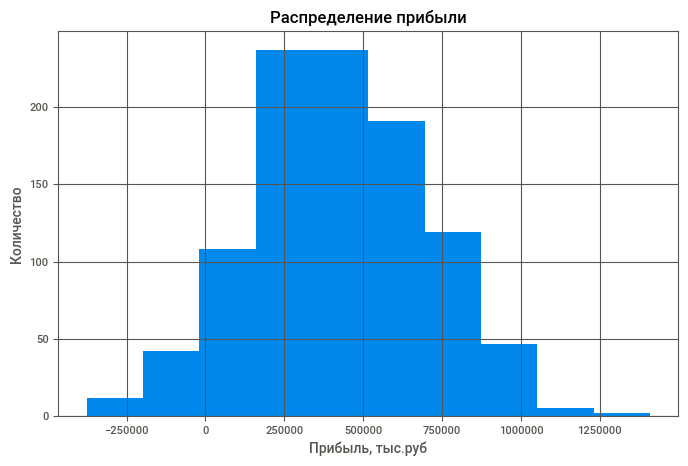

Средняя прибыль: 425.94 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -102.09 млн.руб до: 947.98 млн.руб
95%-ый доверительный интервал: от 408.73 млн.руб до 443.14 млн.руб
Процент вероятности убытка в данном регионе составит 6.0%
Wall time: 913 ms


In [139]:
%%time
bootstap(target_valid_1,predictions_1)

##  Распределение по региону №2

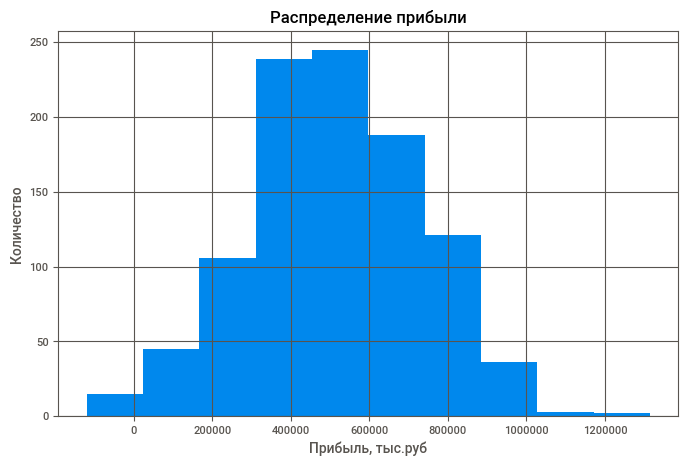

Средняя прибыль: 515.22 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 68.87 млн.руб до: 931.55 млн.руб
95%-ый доверительный интервал: от 501.62 млн.руб до 528.82 млн.руб
Процент вероятности убытка в данном регионе составит 1.0%
Wall time: 914 ms


In [140]:
%%time
bootstap(target_valid_2,predictions_2)

##  Распределение по региону №3

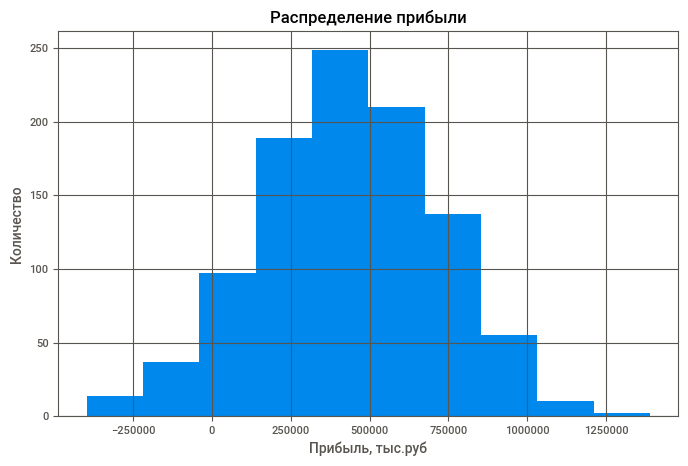

Средняя прибыль: 435.01 млн.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -128.88 млн.руб до: 969.71 млн.руб
95%-ый доверительный интервал: от 417.45 млн.руб до 452.56 млн.руб
Процент вероятности убытка в данном регионе составит 6.4%
Wall time: 923 ms


In [141]:
%%time
bootstap(target_valid_3,predictions_3)

### Выбор региона
### После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью


In [142]:
data = pd.DataFrame(index=['Средняя прибыль в регионе, млн.руб','Суммарный запас сырья, тыс.баррелей','Вероятность убытка, %'], columns=['1 регион','2 регион','3 регион'])
data['1 регион'] = '426', '31102','6'
data['2 регион'] = '515', '27746','1'
data['3 регион'] = '435.01', '29604','6.4'
data

,1 регион,2 регион,3 регион
"Средняя прибыль в регионе, млн.руб",426,515,435.01
"Суммарный запас сырья, тыс.баррелей",31102,27746,29604
"Вероятность убытка, %",6,1,6.4


**Вывод:**

Вероятность убытков меньше 2,5% соответствует только для второго региона

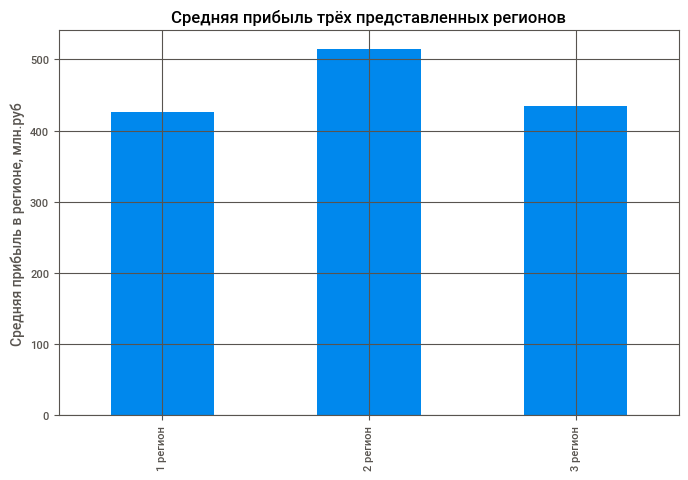

In [143]:
data.astype('float').iloc[0,:].plot(kind="bar", figsize=(8,5), grid=True, subplots=True)
plt.title('Средняя прибыль трёх представленных регионов')
plt.ylabel('Средняя прибыль в регионе, млн.руб')
plt.show()

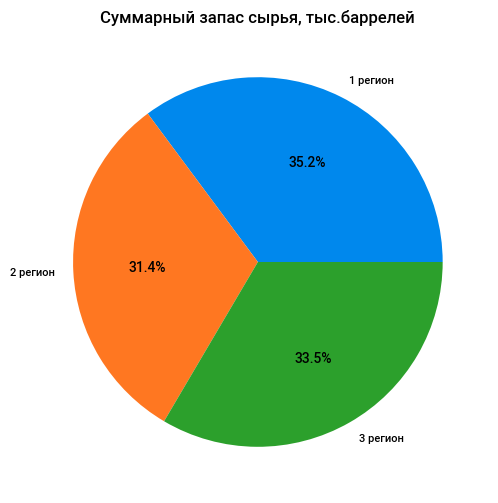

In [144]:
data.astype('float').iloc[1,:].plot(kind='pie', figsize=(6,6),autopct='%1.1f%%', subplots=True)
plt.title('Суммарный запас сырья, тыс.баррелей')
plt.ylabel('')
plt.show()

# Вывод

Как итог выбираем 2-ой регион.
- Он оказался единственным подходящим по вероятности % убытка, меньше 2,5%;
- Он с наибольшей средней прибылью 515 млн. руб.





<div class="alert alert-block alert-info">
<b>Совет: </b>
    
Не забудь обновить вывод, если потребуется
</div>                                                              



<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Отлично, проведено детальное исследование и был выбран правильный регион!
</div>


<div class="alert alert-block alert-info">
<b>Совет[2]: </b> Если интересно изучить тему бутстрапа глубже - я оставлю  ниже несколько интересных и полезных ссылок по теме:
        
1. "Bootstrap Hypothesis Testing in Statistics with Example" 
        
https://www.youtube.com/watch?v=9STZ7MxkNVg
        
2. "How to Calculate Bootstrap Confidence Intervals For Machine Learning Results in Python" 
        
https://machinelearningmastery.com/calculate-bootstrap-confidence-intervals-machine-learning-results-python/
        
3. "A Gentle Introduction to the Bootstrap Method" 

https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
        
4. "An Introduction to the Bootstrap Method" 
        
https://towardsdatascience.com/an-introduction-to-the-bootstrap-method-58bcb51b4d60#:~:text=The%20basic%20idea%20of%20bootstrap,population%20mean)%20on%20sample%20data.&amp;text=A%20sample%20from%20population%20with%20sample%20size%20n
        
5. "Bootstrapping and Resampling in Statistics with Example" 
        
        
https://www.youtube.com/watch?v=O_Fj4q8lgmc

6. Также одна из программ на рынке по этой теме управлненеческого моделирования - AnyLogic - интересный продукт. Можешь видео из интернета посмотреть по какому-нибудь примеру с её использованием. Тогда тема управленческого моделирования и бутстрапа может по-другому лечь.
</div>